In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = {
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
}
df = pd.DataFrame(data, columns=['x', 'y'])

In [3]:
# create and fit model
random_state = np.random.RandomState(0)
kmeans = KMeans(
    n_clusters=3, # number of clusters
    # method of initialization, k-means++ selects initial cluster centers 
    # for k-mean clustering in a smart way to speed up convergence
    init='k-means++', 
    n_init=10, # number of time the k-means algorithm will be run with different centroid seeds
    max_iter=300, # maximum number of iterations of the k-means algorithm for a single run
    tol=1e-4, # relative tolerance with regards to inertia to declare convergence
    # k-means algorithm to use, lloyd is the standard algorithm, like the original k-means algorithm
    algorithm='lloyd', 
    random_state=random_state # random number generator
).fit(df)

In [4]:
# find the centroids of the clusters
centroids = kmeans.cluster_centers_
print(centroids)

[[50.         63.16666667]
 [62.33333333 15.83333333]
 [23.42857143 44.57142857]]


In [5]:
# get associated clusters for each point
labels = kmeans.labels_
print(labels)

[2 2 2 2 2 2 2 0 0 0 0 0 0 1 1 1 1 1 1]


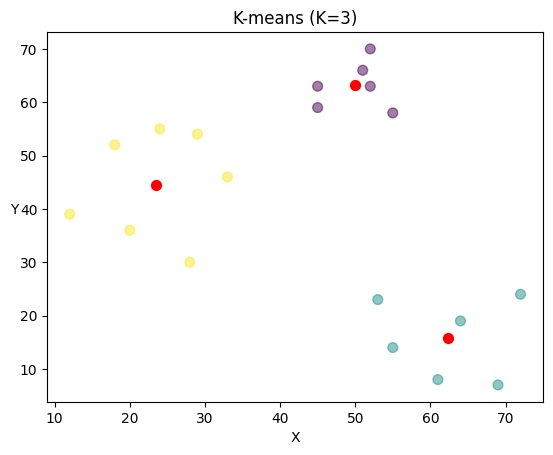

In [6]:
_ = plt.scatter(df['x'], df['y'], c=labels.astype(float), s=50, alpha=.5)
_ = plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
_ = plt.title('K-means (K=3)')
_ = plt.xlabel('X')
_ = plt.ylabel('Y', rotation=0)

In [7]:
# predict new points
kmeans.predict(pd.DataFrame({'x':[20,60], 'y':[20,40]}))

array([2, 1], dtype=int32)